In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from importlib import reload
from utils import *
import test
import acd

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


In [4]:
reload(acd)
acd_ = acd.ACD(w2v)
acd_.train_acd()

Loading tokenizer...
-- ACD:
Loading dataset...
Training...
Evaluating...
F1: 0.7836021505376345


In [40]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
datasets = pd_.load_grid_datasets()

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
g

Running SVM (baseline, w2v)...
           C  Mean Accuracy
0   0.010000       0.675911
1   0.062105       0.676704
2   0.114211       0.730983
3   0.166316       0.771791
4   0.218421       0.787639
5   0.270526       0.795166
6   0.322632       0.799921
7   0.374737       0.800713
8   0.426842       0.802694
9   0.478947       0.801109
10  0.531053       0.803883
11  0.583158       0.805864
12  0.635263       0.805468
13  0.687368       0.804279
14  0.739474       0.807052
15  0.791579       0.807052
16  0.843684       0.807448
17  0.895789       0.806656
18  0.947895       0.807448
19  1.000000       0.807448
Running SVM (append, w2v)...
           C  Mean Accuracy
0   0.010000       0.676307
1   0.062105       0.746830
2   0.114211       0.762282
3   0.166316       0.775357
4   0.218421       0.785658
5   0.270526       0.791601
6   0.322632       0.800713
7   0.374737       0.803090
8   0.426842       0.804279
9   0.478947       0.804279
10  0.531053       0.806260
11  0.583158    

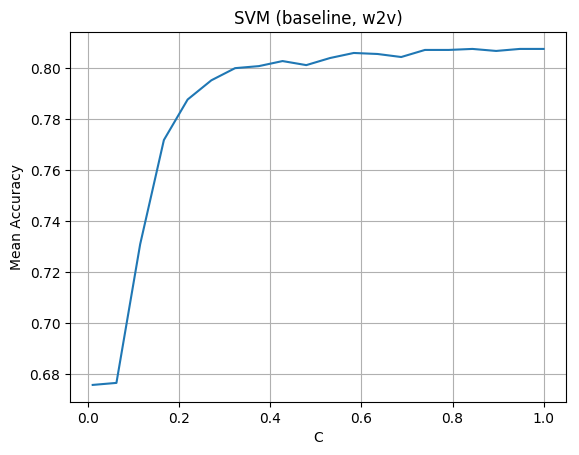

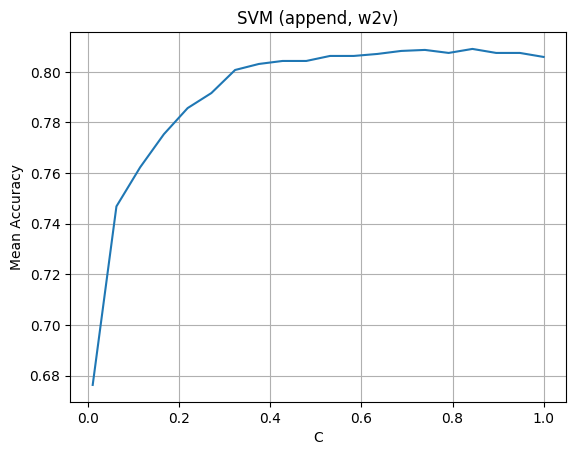

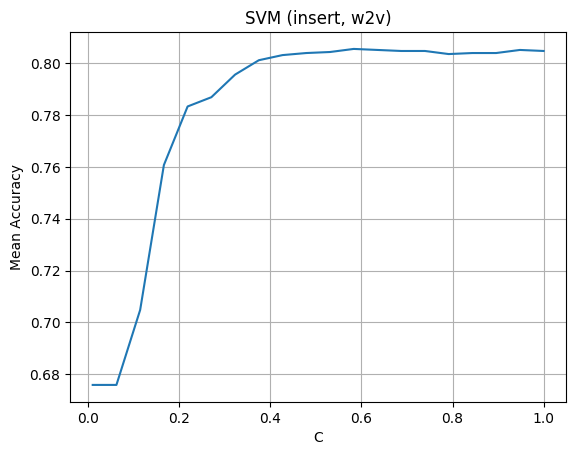

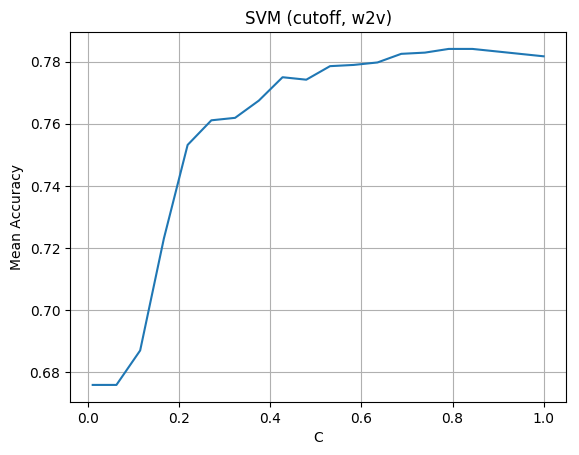

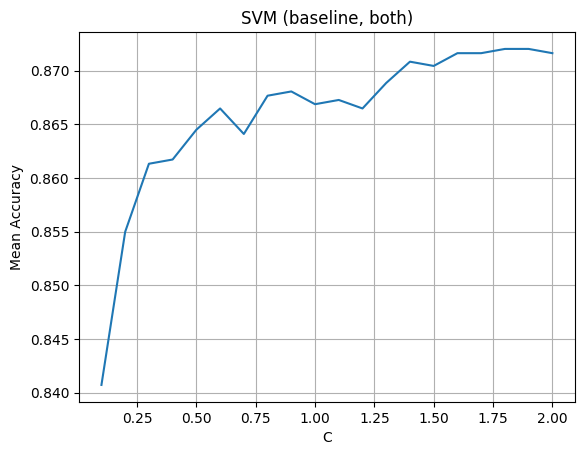

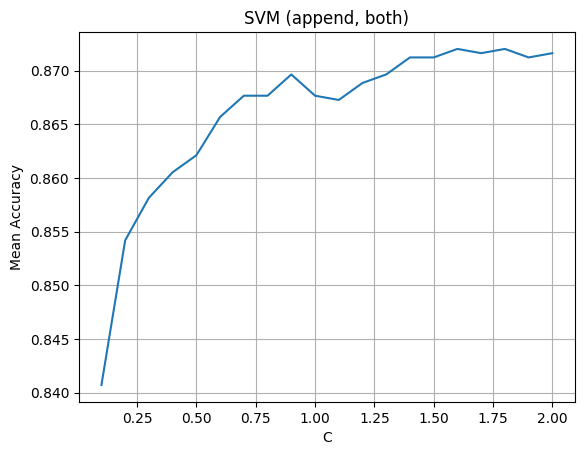

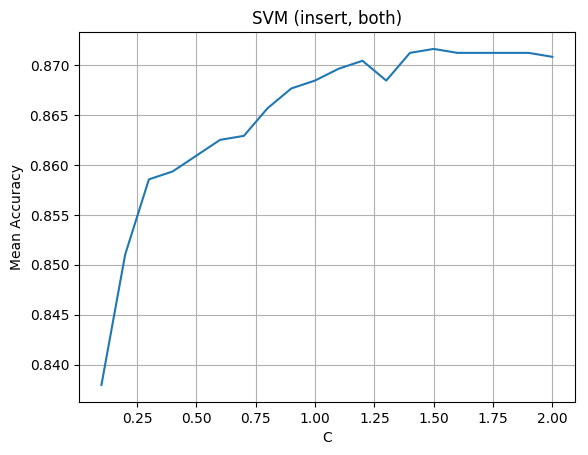

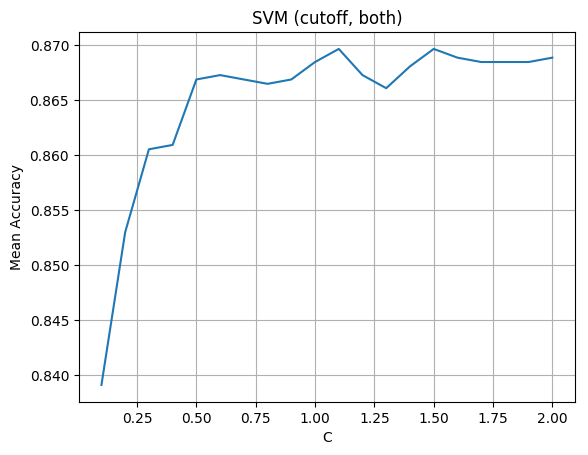

In [41]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.grid_search_pd(datasets, n_jobs=6)

Running CNN (baseline, w2v)...
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/20
2524/2524 [==============================]

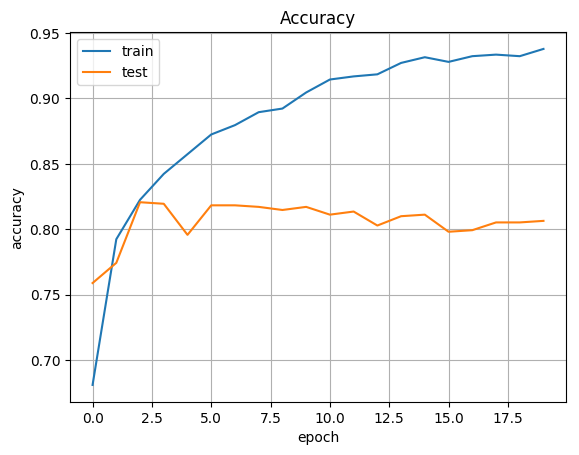

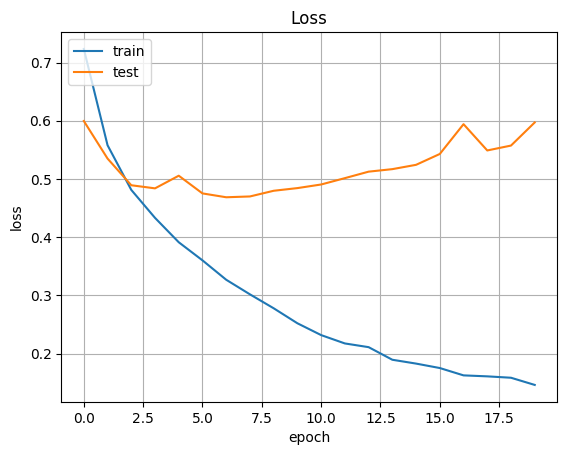

Max val_acc: 0.8206650732248809 (epoch: 3)
Running CNN (linear, w2v)...
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/20
2

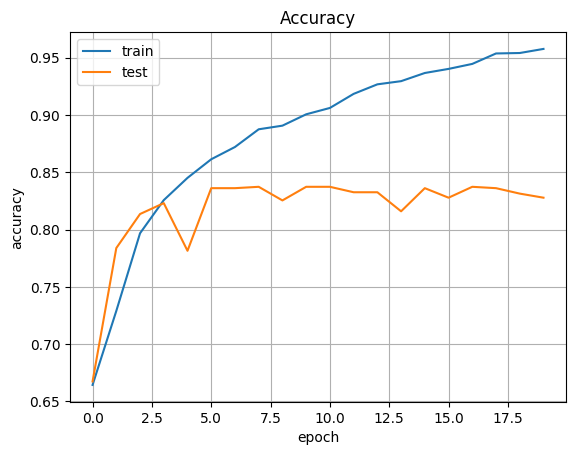

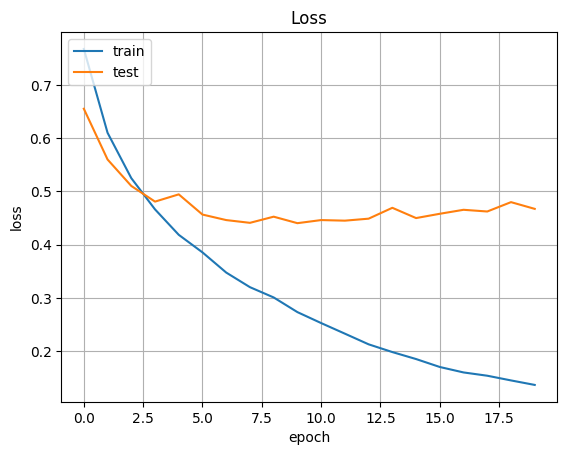

Max val_acc: 0.8372921595380878 (epoch: 10)
Running CNN (tree, w2v)...
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/20
25

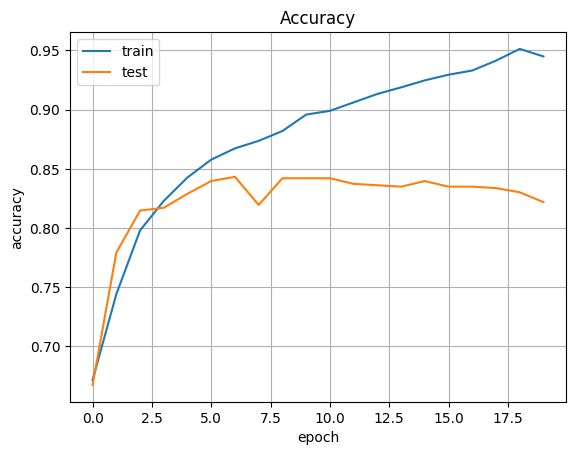

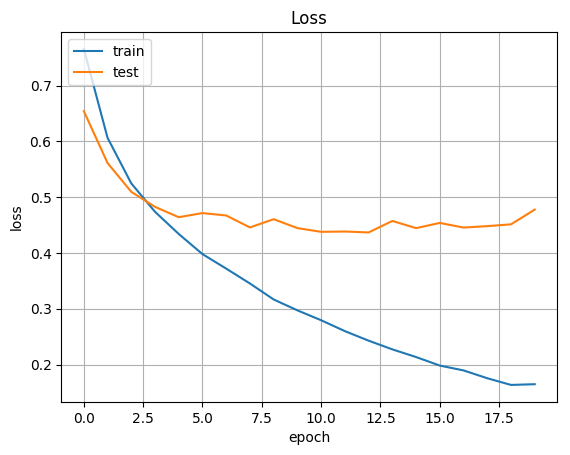

Max val_acc: 0.8432304018183728 (epoch: 7)
                Модель  Accuracy
0  CNN (baseline, w2v)  0.820665
1    CNN (linear, w2v)  0.837292
2      CNN (tree, w2v)  0.843230


In [43]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.grid_search_pd_keras()

In [26]:
data = pd_.prepare_data(pd_.get_pd_features_map_tree_distance, False)

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587


-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/8
2524/2524 [==============================] - 2s - loss: 0.8365 - acc: 0.67

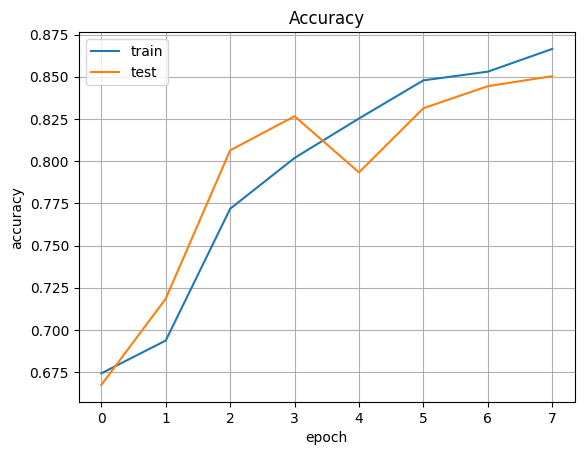

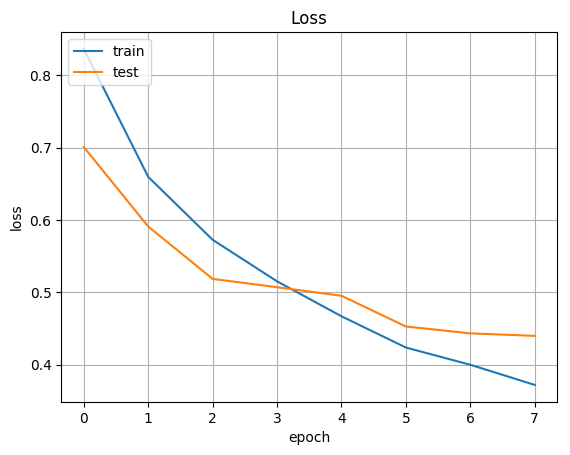

Max val_acc: 0.8503562853341997 (epoch: 8)
Scores: [0.85035628533419971, 0.87292161520190026]
    Mult     Score
0    0.5  0.863420
1    0.6  0.869359
2    0.7  0.870546
3    0.8  0.874109
4    0.9  0.874109
5    1.0  0.872922
6    1.1  0.876485
7    1.2  0.876485
8    1.3  0.877672
9    1.4  0.877672
10   1.5  0.876485
11   1.6  0.876485
12   1.7  0.876485
13   1.8  0.875297
14   1.9  0.876485
15   2.0  0.878860
16   2.1  0.878860
17   2.2  0.877672
18   2.3  0.875297
19   2.4  0.876485
20   2.5  0.877672
21   2.6  0.876485
22   2.7  0.877672
23   2.8  0.877672
24   2.9  0.877672
25   3.0  0.878860
26   3.1  0.878860
27   3.2  0.878860
28   3.3  0.877672
29   3.4  0.877672
30   3.5  0.876485
31   3.6  0.876485
32   3.7  0.876485
33   3.8  0.876485
34   3.9  0.876485
35   4.0  0.875297
36   4.1  0.875297
37   4.2  0.874109
38   4.3  0.874109
39   4.4  0.875297
40   4.5  0.875297
41   4.6  0.875297
42   4.7  0.876485
43   4.8  0.876485
44   4.9  0.874109
max_score_mult: 1.99999999999999

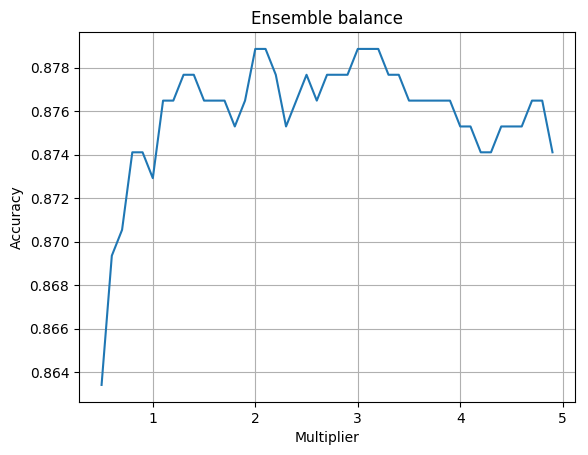

0.87885985748218531

In [39]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.train_pd_keras_both_svm(data=data)